# Best-selling suppliers in gijón by gender

In [1]:
# required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('dataset_e3.csv')

In [3]:
df0.head(3)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad
0,1,Cocina,2,Otoño,112.28,2.7,me gusto,Flora,Valladolid
1,1,Baño,6,Verano,479.51,1.7,la calidad no es la esperada,Don limpio,Valladolid
2,1,Baño,6,Primavera,459.00,4.8,justo lo que esperaba,Cristasol,Valladolid


In [6]:
# df with the user info
df1 = pd.read_csv( 'users_data.csv' )
df1.head(3)

,usuario,genero,edad,ciudad,gasto_mes,miembro_plus,dispositivo,tiempo_mes
0,1,Mujer,21,Valladolid,483.81,0,PC,3.30
1,2,Mujer,45,Valladolid,186.30,1,PC,6.60
2,3,Mujer,64,Murcia,396.03,0,PC,2.09


In [7]:
# df with the gender
df_gender = df1[ ['usuario', 'genero'] ]

In [8]:
# Add the gender to the df0
df2 = df0.set_index('usuario').join( df_gender.set_index('usuario') )

In [11]:
# review the shape df2
df2.shape

(10000, 9)

In [18]:
df3 = df2.reset_index()

In [24]:
# Example: titanic[titanic["Age"] > 35]
# The best selling city in spring
best_selling_city_season = df3[ 
                               (df3['ciudad']== 'Gijón')
                               & (df3['fecha']== 'Primavera')
                               ]

In [25]:
best_selling_city_season.shape

(429, 10)

In [26]:
best_selling_city_season.head(3)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad,genero
133,8,Ferreteria,10,Primavera,31.30,2.3,la calidad no es la esperada,Sika,Gijón,Hombre
134,8,Deporte,7,Primavera,100.18,3.6,buena relacion calidad-precio,Asics,Gijón,Hombre
135,8,Electronica,5,Primavera,152.73,3.8,buena relacion calidad-precio,Apple,Gijón,Hombre


In [27]:
best_selling_city_season_1 = best_selling_city_season.copy()

In [28]:
best_selling_city_season_1.head(3)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad,genero
133,8,Ferreteria,10,Primavera,31.30,2.3,la calidad no es la esperada,Sika,Gijón,Hombre
134,8,Deporte,7,Primavera,100.18,3.6,buena relacion calidad-precio,Asics,Gijón,Hombre
135,8,Electronica,5,Primavera,152.73,3.8,buena relacion calidad-precio,Apple,Gijón,Hombre


In [29]:
top_suppliers_gijon_gender = best_selling_city_season_1[ [ 'genero', 'precio', 'proveedores' ] ]

In [30]:
# Cantidad de proveedores
len(top_suppliers_gijon_gender['proveedores'].unique())

44

In [36]:
# df de ventas por proveedor
#top_suppliers_gijon_gender.groupby(['proveedores']).sum()
suppliers_sales = top_suppliers_gijon_gender.groupby(['proveedores']).sum()

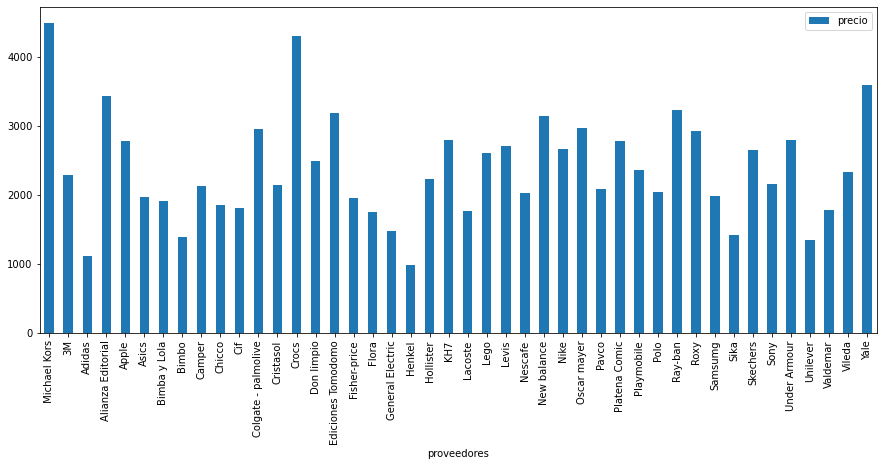

In [37]:
# Gráfica desordenada de los proveedores más vendidos
suppliers_sales.plot.bar( figsize=(15,6) );

In [38]:
# proveedores ordenados por ventas
# suppliers_sales.sort_values(by='precio', ascending=False)
suppliers_sorted_by_price = suppliers_sales.sort_values(by='precio', ascending=False)

In [39]:
# The worst supplier
suppliers_sorted_by_price.index.tolist()[-1]

'Henkel'

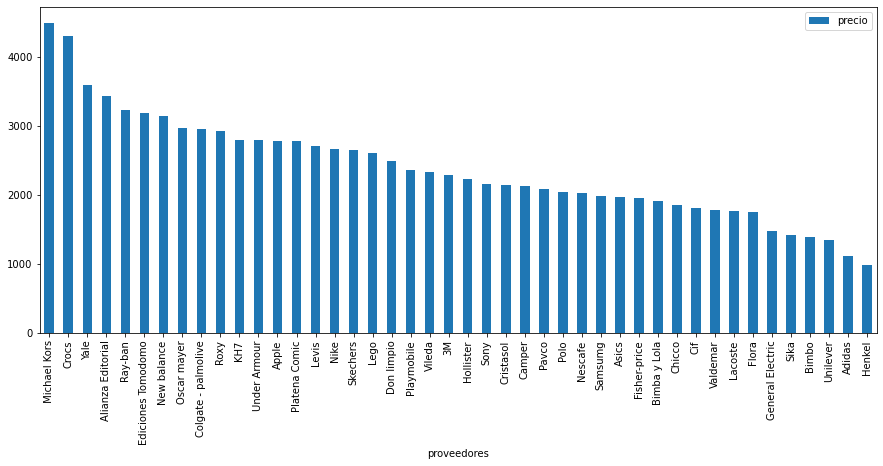

In [40]:
# Gráfica de los proveedores maś vendidos
suppliers_sorted_by_price.plot.bar( figsize=(15,6) );

In [41]:
# Por inspección visual, se decide trabajar con los primeros 5
# Primeros 15 proveedores
top_5_supp = suppliers_sorted_by_price.iloc[:5]

In [42]:
print( top_5_supp.index.to_list() )

[' Michael Kors', 'Crocs', 'Yale', 'Alianza Editorial', 'Ray-ban']


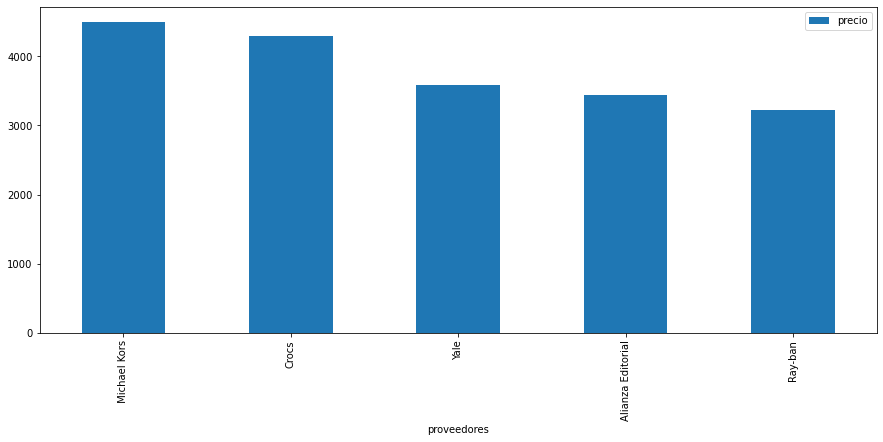

In [46]:
# graph top 5 selling suppliers
top_5_supp.plot.bar( figsize=(15,6) );

In [47]:
# 5 proveedores más vendidos
print( top_5_supp.index.to_list() )
#list_5_sup = top_5_supp.index.to_list()


[' Michael Kors', 'Crocs', 'Yale', 'Alianza Editorial', 'Ray-ban']


In [48]:
top_suppliers_gijon_gender.head(3)

,genero,precio,proveedores
133,Hombre,31.30,Sika
134,Hombre,100.18,Asics
135,Hombre,152.73,Apple


In [49]:
top_suppliers_gijon_gender.shape

(429, 3)

In [54]:
#top_suppliers_gijon_gender[top_suppliers_gijon_gender['proveedores']==' Michael Kors']

In [55]:
# df con los top 5 proveedores

top_5_sup = top_suppliers_gijon_gender[ 
                      ( top_suppliers_gijon_gender['proveedores'] == ' Michael Kors' )
                    | ( top_suppliers_gijon_gender['proveedores'] == 'Crocs' )
                    | ( top_suppliers_gijon_gender['proveedores'] == 'Yale' )
                    | ( top_suppliers_gijon_gender['proveedores'] == 'Alianza Editorial' )
                    | ( top_suppliers_gijon_gender['proveedores'] == 'Ray-ban' )
                    ]

In [56]:
top_5_sup.head(3)

,genero,precio,proveedores
143,Hombre,455.56,Michael Kors
153,Hombre,432.40,Alianza Editorial
373,Hombre,449.82,Yale


In [59]:
# Temparada en la que más se venden estos provedores
# pd.pivot_table(data=df6, index=['ciudad'], values='precio', columns=['fecha'], aggfunc=np.sum)
pd.pivot_table( data=top_5_sup, index=['proveedores'], values='precio', columns=['genero'], aggfunc=np.sum )

genero,Hombre,Mujer
proveedores,,
Michael Kors,2854.71,1637.68
Alianza Editorial,1777.39,1657.46
Crocs,2026.13,2274.92
Ray-ban,1131.43,2094.62
Yale,2083.18,1508.84


In [62]:
# Se guarda en un df
suppliers_by_gender = pd.pivot_table( data=top_5_sup, index=['proveedores'], values='precio', columns=['genero'], aggfunc=np.sum )

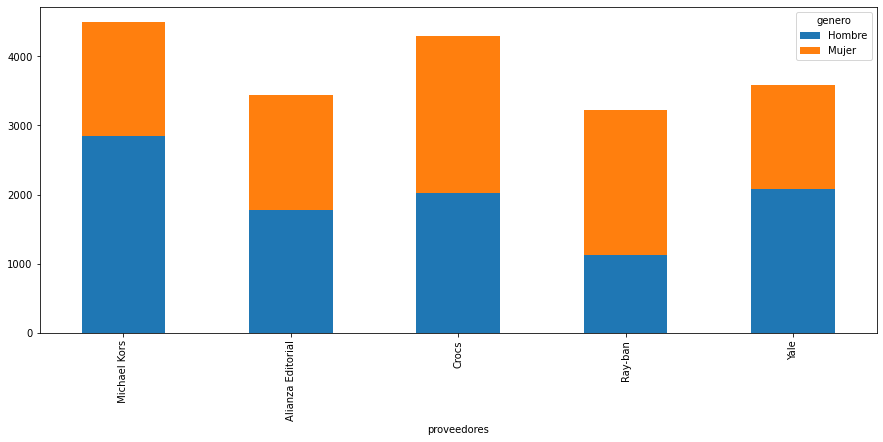

In [64]:
# Gráfica con las ventas acumuladas por temporada
suppliers_by_gender.plot.bar(stacked=True, figsize=(15, 6));

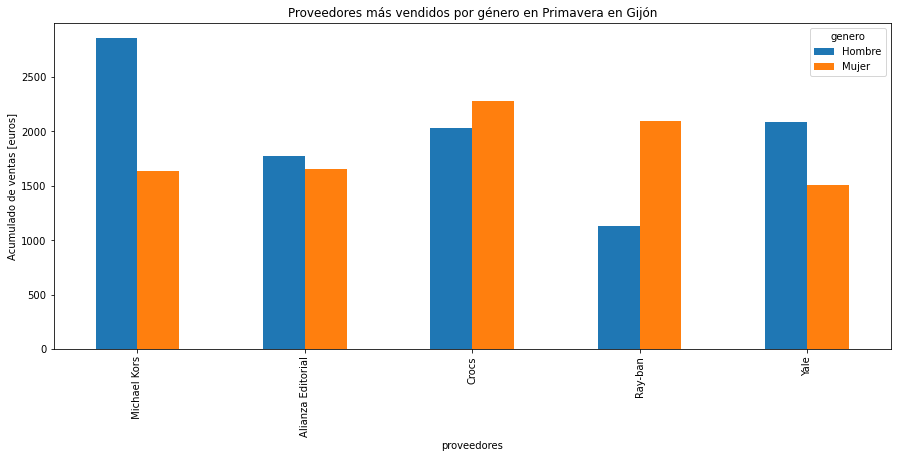

In [70]:
# gráfica con las ventas segregadas por temporada
suppliers_by_gender.plot.bar( figsize=(15,6) );
plt.title('Proveedores más vendidos por género en Primavera en Gijón');
plt.ylabel('Acumulado de ventas [euros]');